###### In this code I will implement operation for counting how many players have visited *The International* throught it's history without duplicating the data and using pandas coding tools. Wish me luck.

In [1]:
import pandas as pd
import numpy as np
#import warnings
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.reset_option('display.max_rows')
#pd.reset_option('display.max_columns')

In [5]:
#Creation of dataframes (also made a list containing all Int.s)
CR_10 = pd.read_csv('TI_2011/Country Representation.csv')

CR_11 = pd.read_csv('TI_2011/Country Representation.csv')
CR_12 = pd.read_csv('TI_2012/Country Representation.csv')
CR_13 = pd.read_csv('TI_2013/Country Representation.csv')
CR_14 = pd.read_csv('TI_2014/Country Representation.csv')
CR_15 = pd.read_csv('TI_2015/Country Representation.csv')
CR_16 = pd.read_csv('TI_2016/Country Representation.csv')
CR_17 = pd.read_csv('TI_2017/Country Representation.csv')
CR_18 = pd.read_csv('TI_2018/Country Representation.csv')
CR_19 = pd.read_csv('TI_2019/Country Representation.csv')

#all databases except TI_2021 are in same format, so for now we will ignore the last dataset, for now.
CR_21 = pd.read_csv('TI_2021/Country Representation.csv')

CR_list = [CR_11,CR_12,CR_13,CR_14,CR_15,CR_16,CR_17,CR_18,CR_19]
CR_11.dtypes

Unnamed: 0         int64
Country           object
No. of Players     int64
Players           object
dtype: object

In [3]:
CR_11

,Unnamed: 0,Country,No. of Players,Players
0,0,China,19,"Awoke,Kabu,DD,Hao,Faith,SanSheng,Zhou,xiao8,Fe..."
1,1,Denmark,9,"MiSeRy,MaNia,PlaymatE,Maelk,syndereN,AngeL,MiG..."
2,2,Russia,7,"LighTofHeaveN,Azen,NS,Dread,ARS-ART,Santa,God"
3,3,France,5,"Maldejambes,VladTepes,Sockshka,Pseudo,Ph0eniX"
4,4,Malaysia,5,"SilverCross,Net,Sharky,xiaoling,kYxY"
5,5,Singapore,5,"Hyhy,Xy-,ToFu,Chawy,Roy"
6,6,Thailand,5,"13nu,TnK,LaKelz,Lookball,aabBAA"
7,7,Philippines,5,"Wootz,Julz,John,Owa,VASH"
8,8,Ukraine,3,"Artstyle,Dendi,XBOCT"
9,9,Germany,3,"KuroKy,Kebap,Kev-"


Next thing is to try counting players without duplicates, for starter. Turned out to be, it is a good idea to split strings and have list of them, the mehtod is straightforward and is shown below.

In [4]:
#Will seperate Players table into list of strings with player names:
def ListMaker(df):
    df['Players_list'] = df['Players'].apply(lambda x: x.split(','))
    #I decided get rid of the excessive 'Players', now that we have a list repr. of them.
    df.drop("Players", axis='columns',inplace=True)
    return df

In [6]:
ListMaker(CR_10)
pd.concat([CR_11.head(), CR_11.tail()])

,Unnamed: 0,Country,No. of Players,Players
0,0,China,19,"Awoke,Kabu,DD,Hao,Faith,SanSheng,Zhou,xiao8,Fe..."
1,1,Denmark,9,"MiSeRy,MaNia,PlaymatE,Maelk,syndereN,AngeL,MiG..."
2,2,Russia,7,"LighTofHeaveN,Azen,NS,Dread,ARS-ART,Santa,God"
3,3,France,5,"Maldejambes,VladTepes,Sockshka,Pseudo,Ph0eniX"
4,4,Malaysia,5,"SilverCross,Net,Sharky,xiaoling,kYxY"
14,14,Canada,1,1437
15,15,Croatia,1,Lacoste
16,16,Estonia,1,Puppey
17,17,Macau,1,DDC
18,18,Romania,1,ComeWithMe


In [7]:
# This is done to re-new all tables for the format like above.
for df in CR_list:
    ListMaker(df)

In [8]:
# Done to join values of different lists into one.
def ListJoiner(df):
    df.Players_list = [item for sublist in df.Players_list for item in sublist]
    return df
# Each year the same players attnend the event, thus we remove duplicates.
def RemoveDuplicates(df):
    df.Players_list = list(set(df.Players_list))
    return df

In [9]:
# Re-newed table with number of players who visited the rounament at least for once in their lives.
def Players_Count(df):
    df = df.groupby('Country')['Players_list'].agg(list).reset_index()
    df = df.apply(ListJoiner, axis=1)
    
    df_exploded = df.explode('Players_list')
    df_exploded = df_exploded.groupby('Country')['Players_list'].nunique()
    
    df = pd.merge(df, df_exploded,how='inner', on='Country')
    df = df.rename(columns={'Players_list_x': 'Players_list', 'Players_list_y': 'UN_of_P'})
    
    df = df.apply(RemoveDuplicates, axis=1)
    return df.sort_values(by='UN_of_P', ascending=False)

In [10]:
CR_df = pd.concat(CR_list)
pd.concat([Players_Count(CR_df).head(), Players_Count(CR_df).tail()])

,Country,Players_list,UN_of_P
8,China,"[END, ksssssss, Setsu, Hao, PCT, Somnus丶M, Mu,...",90
23,Malaysia,"[ddz, Ahjit, Moon, MoZuN, Ice, YamateH, Silver...",32
33,Russia,"[Bloodangel, LighTofHeaveN, Crazy, PGG, Solo, ...",26
41,United States,"[Sneyking, Zfreek, USH, UNiVeRsE, CCnC, HANNAH...",20
40,Ukraine,"[Lil, ALOHADANCE, Dendi, DkPhobos, Goblak, Art...",20
31,Poland,[Nisha],1
22,Macedonia,[Saksa],1
16,Greece,[Keyser],1
24,Mexico,[Zyzz],1
12,Estonia,[Puppey],1


<Axes: ylabel='Frequency'>

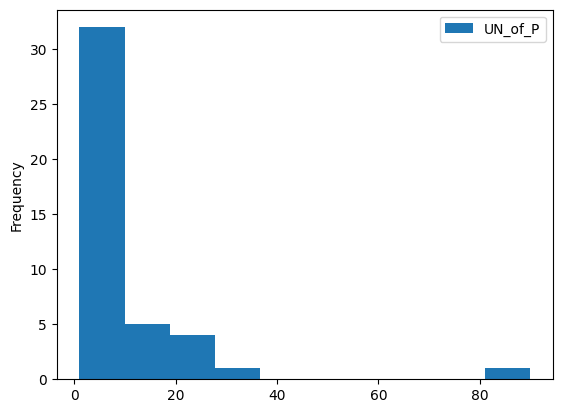

In [11]:
Players_Count(CR_df).plot.hist()

In [ ]:
#CheatSheet for a beginner :)

#CR_11[CR_11['Country']=='Ukraine'][['Players']]
#single_string = df['Column1'][0]

#for index, value in enumerate(my_list):
#    print(index, value)
    
#CR_11['Players'][8] = CR_11['Players'][8].split(',')
#CR_11['Players_list'] = CR_12['Players'].apply(lambda x: x.split(','))